In [1]:
# installing Dependencies

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn

**Importing all the dependencies**

In [2]:
# core libraries
import numpy as np      # Numerical operations and array management 
import pandas as pd     # Data manipulation, cleaning, filtering, aggregation

#visualization Libraries
import matplotlib.pyplot as plt   # Basic plotting (histograms, line plots, etc.)
import seaborn as sns             # Statistical visualization (correlations, heatmaps, etc.)
import plotly.express as px        # Interactive plotting (simple) for pie charts, line plots, etc.
import plotly.graph_objects as go  # More control over interactive Plotly plots
from plotly.subplots import make_subplots  # Combining multiple plots into one interactive figure


# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore non-critical warnings to keep output clean

**Read CSV dataset**

In [6]:
df = pd.read_csv("/home/rafi/Project/healthcare_eda/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
df.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


In [9]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

*Numerical column*

In [10]:
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Age', 'Billing Amount', 'Room Number']


In [11]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.

df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


*Non-numeric / Object Column Name*

In [12]:
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [13]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
df.describe(include = 'object').T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [14]:
#computes summary of the DataFrame including numeric and categorical columns.

df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [15]:
# return a tuple with the dimension of the dataframe
df.shape

(55500, 15)

There are 555000 rows and 15 columns in this dataset.

**DATA CLEANING**

*Null Values*

Incase there were null values we can get rid of them using dropna function.

In [16]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [17]:
# dropping rows with Null values

df.dropna(inplace=True)
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

*Duplicate rows*

In [18]:
#check if there are duplicate records in the data

df_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {df_duplicated}")

Number of duplicated rows: 534


In [19]:
# drop duplicates
df = df.drop_duplicates()

# check duplicated rows agin
df_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {df_duplicated}")

Number of duplicated rows: 0


In [20]:
print(f"Rows in Data: {df.shape[0]}, Columns in Data: {df.shape[1]})")
df.shape

Rows in Data: 54966, Columns in Data: 15)


(54966, 15)

**Standardize Name Columns**

In [21]:
df["Name"]

0            Bobby JacksOn
1             LesLie TErRy
2              DaNnY sMitH
3             andrEw waTtS
4            adrIENNE bEll
               ...        
55495    eLIZABeTH jaCkSOn
55496           KYle pEREz
55497         HEATher WaNG
55498       JENniFER JOneS
55499         jAMES GARCiA
Name: Name, Length: 54966, dtype: object

name isn't added here correctly. we need to make correction here.

In [23]:
df['Name'] = df['Name'].str.title()
df['Name']

0            Bobby Jackson
1             Leslie Terry
2              Danny Smith
3             Andrew Watts
4            Adrienne Bell
               ...        
55495    Elizabeth Jackson
55496           Kyle Perez
55497         Heather Wang
55498       Jennifer Jones
55499         James Garcia
Name: Name, Length: 54966, dtype: object

Now, Name column looks fine.

**Adjusting Billing Account**

In [24]:
count_non_positive = df[df['Billing Amount'] <= 0].shape[0]
print("Number of rows with Billing Amount <= 0:", count_non_positive)

Number of rows with Billing Amount <= 0: 106


about 106 patients has negative bill number, which can't be possible. what we can do is convert them into posive or drop those patient column.

In [25]:
# Remove rows where Billing Amount is zero or negative and keep only positive value
# df = df[df['Billing Amount'] > 0]

In [26]:
# Convert all billing amounts to positive values
df['Billing Amount'] = df['Billing Amount'].abs()

In [27]:
count_non_positive = df[df['Billing Amount'] <= 0].shape[0]
print("Number of rows with Billing Amount <= 0:", count_non_positive)

Number of rows with Billing Amount <= 0: 0


now, it looks good. 

**Date column type change from object to date**

In [28]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date])
    
#calculate the no: of days patients got admitted in hospital
df['Days Hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)
df['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 54966, dtype: int64

**Analyze Hospital Stay Patterns**

In [29]:
stay_range = df.groupby('Medical Condition')['Days Hospitalized'].agg(['min', 'max', 'mean']).sort_values(by='max', ascending=False)
print("Minimum and Maximum Days in Hospital by Condition:\n", stay_range)

Minimum and Maximum Days in Hospital by Condition:
                    min  max       mean
Medical Condition                     
Arthritis            1   30  15.504231
Asthma               1   30  15.677295
Cancer               1   30  15.501204
Diabetes             1   30  15.430664
Hypertension         1   30  15.436236
Obesity              1   30  15.447627


**Analyze Hospital Bill Patterns**

In [30]:
billing_stats = df.groupby('Medical Condition')['Billing Amount'].agg(['min', 'max', 'mean']).round(2)
billing_stats = billing_stats.rename(columns={
    'min': 'Min Billing',
    'max': 'Max Billing',
    'mean': 'Average Billing'
})
print("Billing Stats by Medical Condition:\n", billing_stats)

Billing Stats by Medical Condition:
                    Min Billing  Max Billing  Average Billing
Medical Condition                                           
Arthritis                26.11     52170.04         25513.05
Asthma                   32.35     52181.84         25635.64
Cancer                    9.24     52373.03         25154.73
Diabetes                 31.03     52211.85         25662.15
Hypertension             23.87     52764.28         25504.91
Obesity                  36.22     52024.73         25806.63


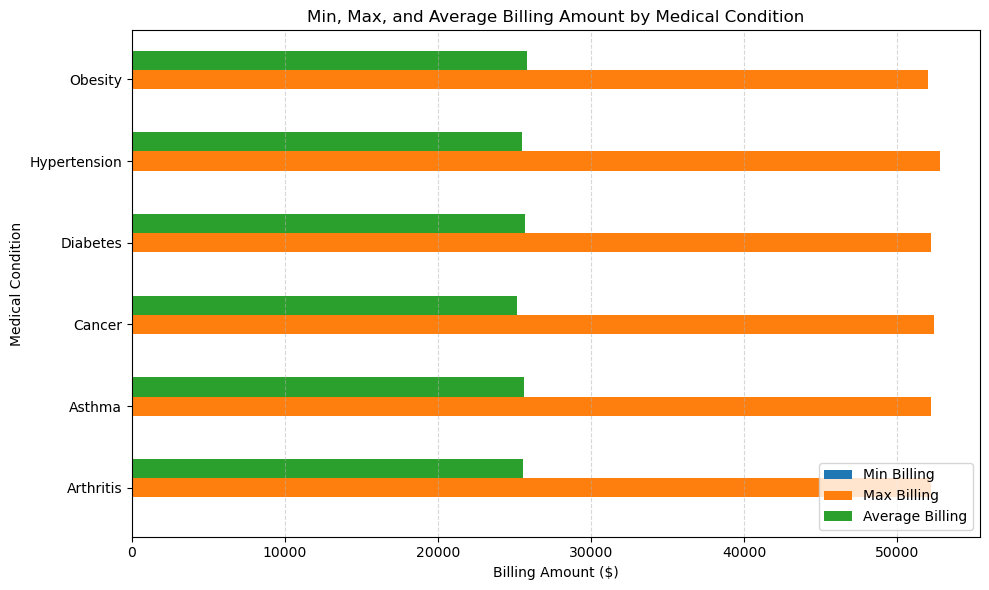

In [31]:
# Plotting grouped bar chart
billing_stats.plot(kind='barh', figsize=(10, 6), width=0.7)

plt.title('Min, Max, and Average Billing Amount by Medical Condition')
plt.xlabel('Billing Amount ($)')
plt.ylabel('Medical Condition')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

KeyError: 'Min Insurance'

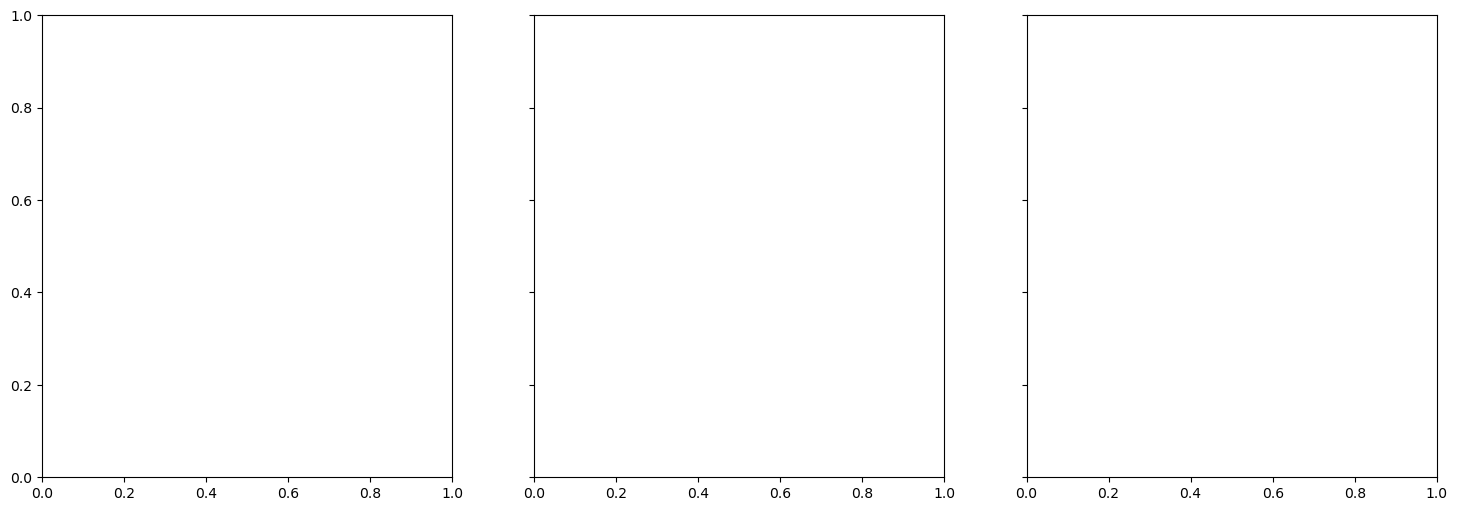

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

billing_stats.sort_values('Min Insurance')['Min Insurance'].plot(kind='barh', ax=axes[0], color='lightgreen')
axes[0].set_title('Min Billing')
axes[0].set_xlabel('Amount ($)')

billing_stats.sort_values('Max Insurance')['Max Insurance'].plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Max Billing')
axes[1].set_xlabel('Amount ($)')

billing_stats.sort_values('Average Insurance')['Average Insurance'].plot(kind='barh', ax=axes[2], color='skyblue')
axes[2].set_title('Average Billing')
axes[2].set_xlabel('Amount ($)')

fig.suptitle('Billing Amounts by Medical Condition', fontsize=16)
plt.tight_layout()
plt.show()


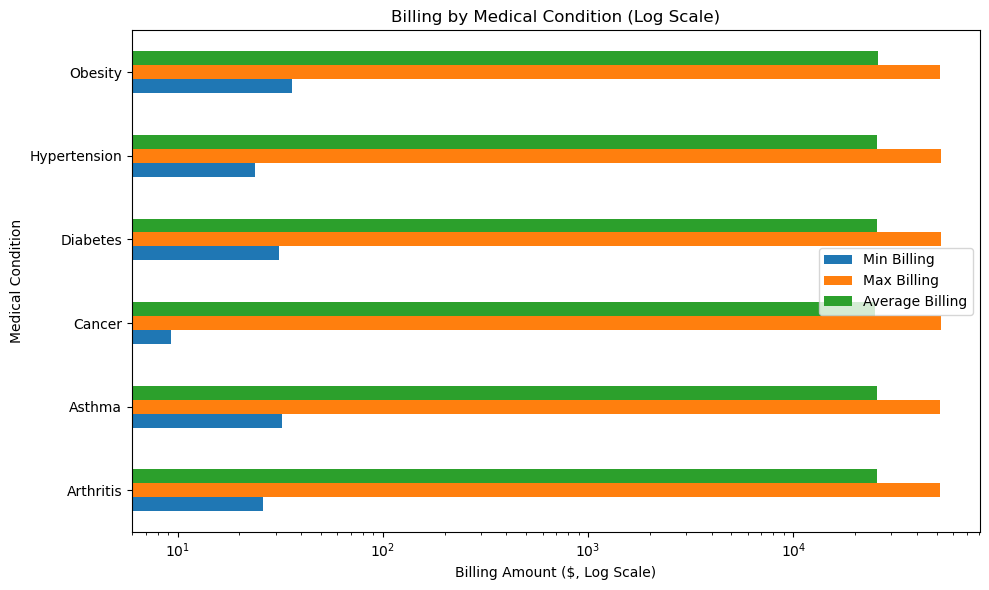

In [33]:
billing_stats.plot(kind='barh', figsize=(10, 6), logx=True)
plt.title('Billing by Medical Condition (Log Scale)')
plt.xlabel('Billing Amount ($, Log Scale)')
plt.tight_layout()
plt.show()

**Count + Total Billing per Insurance Provider**

**Insurance Provider by Medical Condition**

In [ ]:
billing_stats = df.groupby('Medical Condition')['Billing Amount'].agg(['min', 'max', 'mean']).round(2)
billing_stats = billing_stats.rename(columns={
    'min': 'Min Insurance',
    'max': 'Max Insurance',
    'mean': 'Average Insurance'
})
print("Insurance Provider by Medical Condition:\n", billing_stats)

Insurance Provider by Medical Condition:
                    Min Insurance  Max Insurance  Average Insurance
Medical Condition                                                 
Arthritis                  26.11       52170.04           25513.05
Asthma                     32.35       52181.84           25635.64
Cancer                      9.24       52373.03           25154.73
Diabetes                   31.03       52211.85           25662.15
Hypertension               23.87       52764.28           25504.91
Obesity                    36.22       52024.73           25806.63


In [ ]:
insurance_summary = df.groupby('Insurance Provider')['Billing Amount'].agg(['count', 'sum']).round(2)
insurance_summary = insurance_summary.rename(columns={
    'count': 'Number of Patients',
    'sum': 'Total Billing ($)'
})

print("Insurance Summary:\n", insurance_summary)


Insurance Summary:
                     Number of Patients  Total Billing ($)
Insurance Provider                                       
Aetna                            10822       2.765347e+08
Blue Cross                       10952       2.804243e+08
Cigna                            11139       2.843588e+08
Medicare                         11039       2.829313e+08
UnitedHealthcare                 11014       2.799257e+08


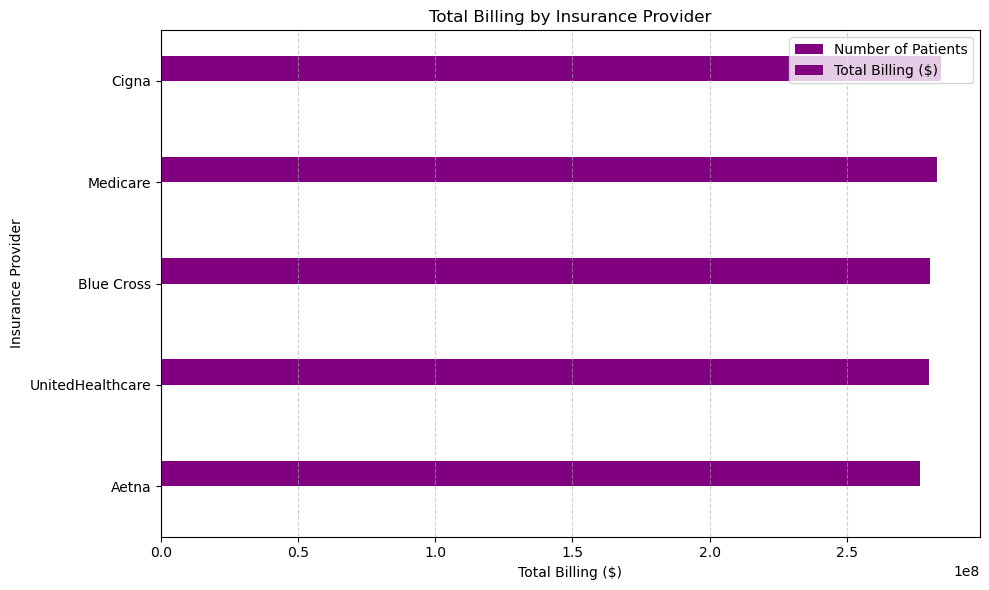

In [ ]:
insurance_summary.sort_values('Total Billing ($)').plot(kind='barh', figsize=(10,6), color='purple')
plt.title('Total Billing by Insurance Provider')
plt.xlabel('Total Billing ($)')
plt.ylabel('Insurance Provider')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Gender
Male      27496
Female    27470
Name: count, dtype: int64
--
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
--
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
--
Doctor
Michael Smith      27
John Smith         22
Robert Smith       21
Michael Johnson    20
James Smith        20
                   ..
Wanda Stark         1
Tiffany Gibson      1
Christy Klein       1
Martin Wilson       1
Paul Cunningham     1
Name: count, Length: 40341, dtype: int64
--
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
--
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64
--
Medication
Lipitor        11038
Ibuprofen      1102